# <center> <b style='font-size:1.5rem'> Projet: “Churn finance” </b> </center>

#### Objectif :
    Développer un modèle d’apprentissage automatique capable de prédire si les clients d’une banque quittent ou non la banque.

<div style='font-size:1.8em; color: black'>
 <b>

    - To Perform EDA.
    - Derive Insights from Data.
    - Converting data from numeric to descriptive.
    - Built Different Classification Models.

</b> </div>
<br>

## Installation & importation des librairies nécessaires

In [1]:
!mkdir data

In [2]:
!gdown 1IGFx1FgzIYfEIq3viV10tx2sG_36YgUm -O data/churn.csv

Downloading...
From: https://drive.google.com/uc?id=1IGFx1FgzIYfEIq3viV10tx2sG_36YgUm
To: /content/data/churn.csv
100% 685k/685k [00:00<00:00, 110MB/s]


In [3]:
# !pip install opendatasets

In [4]:
# import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve,f1_score as f1
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

## Importation du dataset

In [5]:
# # "username": "marytraore", "key": "58ad6fa7ead6f6a289cbba6fb47c0da6"}"
# od.download(
# 	"https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers?select=churn.csv")

In [16]:
df=pd.read_csv("/content/data/churn.csv")

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Comprendre les données

In [19]:
df.shape

(10000, 14)

In [20]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Il y a au total **10 000 enregistrements** et **14 colonnes** disponibles dans l'ensemble de données. * **Sur 14 colonnes**, il y a **11 colonnes numériques** et **3 colonnes catégorielles.**

In [22]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

#### Explication des variables:


  - RowNumber : Identifiant unique pour chaque enregistrement et ne contribue pas directement à l'analyse.
  - CustomerId : Pour différencier les clients individuels au sein de l'ensemble de données.
  - Surname : Nom de famille de chaque client.
  - CreditScore: Solvabilité d'un individu.
  - Geography : Répartition géographique des clients.
  - Gender: Genre (Femme / Homme).
  - Age : Âge du client.
  - Tenure: Nombre d'années ou de mois pendant lesquels le client est associé à la banque.
  - Balance: Montant d'argent sur le compte bancaire du client à un moment précis.
  - NumOfProducts: Produit bancaire utilisé, tel que des comptes d'épargne, des prêts, des cartes de crédit, etc.
  - HasCrCard: Statut de la carte de crédit (0 = Non, 1 = Oui).
  - IsActiveMember: statut d'adhésion actif (0 = Non, 1 = Oui).
  - EstimatedSalary: Salaire estimé.
  - Exited: abandonné ou pas ? (0 = Non, 1 = Oui). C'est la variable que nous cherchons à prédire en utilisant les autres fonctionnalités.

#### Calcul du nombre total de valeurs manquantes.

In [23]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Pas de valeur manquante.

#### Vérification des enregistrements en double

In [24]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Il n’y a aucun enregistrement en double présent dans l’ensemble de données.

 #### Analyse statistique descriptive sur des colonnes numériques

In [25]:
# Calculons les statistiques descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Analyse statistique descriptive sur des colonnes catégorielles

In [26]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Manipulation des données

Les colonnes "RowNumber", "CustomerId" et "Surname" représentent une valeur unique pour chaque client et ne semblent pas pertinentes pour prédire le désabonnement des clients ou non. Nous pouvons donc simplement supprimer ces fonctionnalités.

In [27]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

##### Renommer le nom de la variable cible et ses valeurs avec des valeurs plus appropriées pour une meilleure analyse.

In [28]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [29]:
# Remplacer les valeurs binaires par "Yes" et "No"
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


##### Calcul des valeurs uniques

In [31]:
for col in df.columns:
    print(f'{col:-<50}{df[col].nunique()} éléments uniques')

CreditScore---------------------------------------460 éléments uniques
Geography-----------------------------------------3 éléments uniques
Gender--------------------------------------------2 éléments uniques
Age-----------------------------------------------70 éléments uniques
Tenure--------------------------------------------11 éléments uniques
Balance-------------------------------------------6382 éléments uniques
NumOfProducts-------------------------------------4 éléments uniques
HasCrCard-----------------------------------------2 éléments uniques
IsActiveMember------------------------------------2 éléments uniques
EstimatedSalary-----------------------------------9999 éléments uniques
Churned-------------------------------------------2 éléments uniques


## Analyse exploratoire des données

<ipython-input-32-1d6471cc255a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(df["Churned"],palette="Set2")


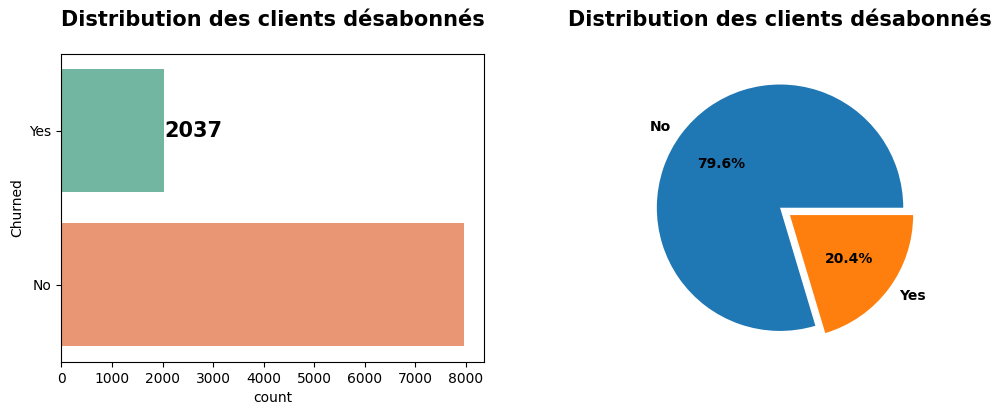

In [32]:
count = df["Churned"].value_counts()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Distribution des clients désabonnés",fontweight="black",size=15,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Distribution des clients désabonnés",fontweight="black",size=15,pad=20)
plt.show()

In [33]:
def countplot(column):
    plt.figure(figsize=(10,4))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Clientèle désabonnée par {column}",fontweight="black",size=20,pad=20)
    plt.show()

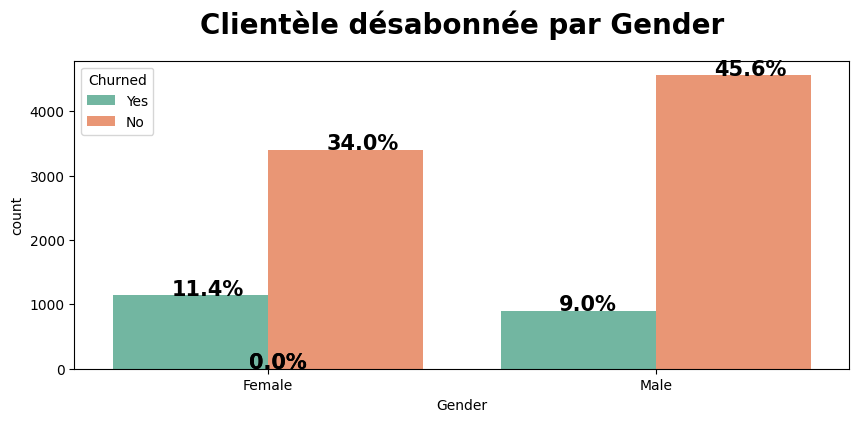

In [34]:
countplot("Gender")

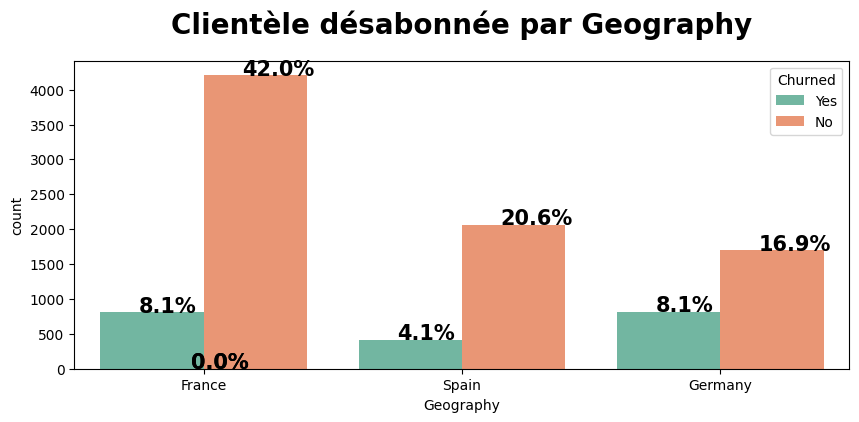

In [35]:
countplot("Geography")

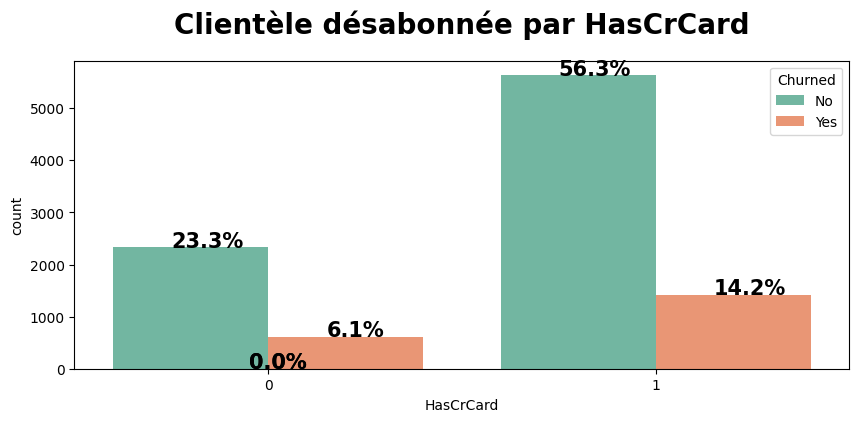

In [36]:
countplot("HasCrCard")

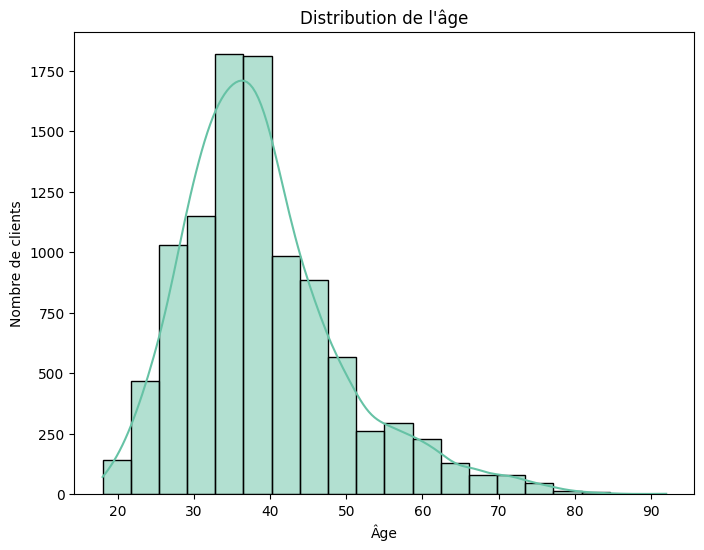

In [37]:
# Distribution de l'âge
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de clients')
plt.show()

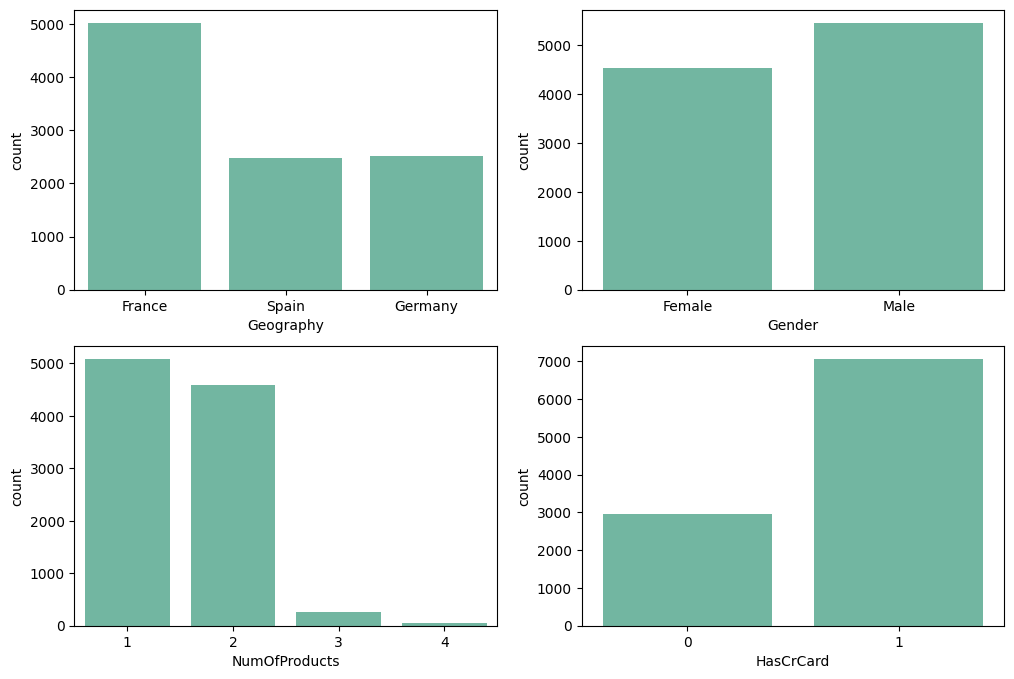

In [38]:
# Tracer les diagrammes de comptage pour chaque variable
cols = 'Geography,Gender,NumOfProducts,HasCrCard'.split(',')

i =1
plt.figure(figsize= (12, 8))
for col in cols:
    plt.subplot(2,2,i)
    sns.countplot(x=df[col])
    i = i +1

plt.show()

#### Conversion des colonnes « objet » en « entier »

In [42]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [43]:
df = df.apply(lambda x: object_to_int(x))
df.rename(columns={"Churned":"Exited"},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Corrélation

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001


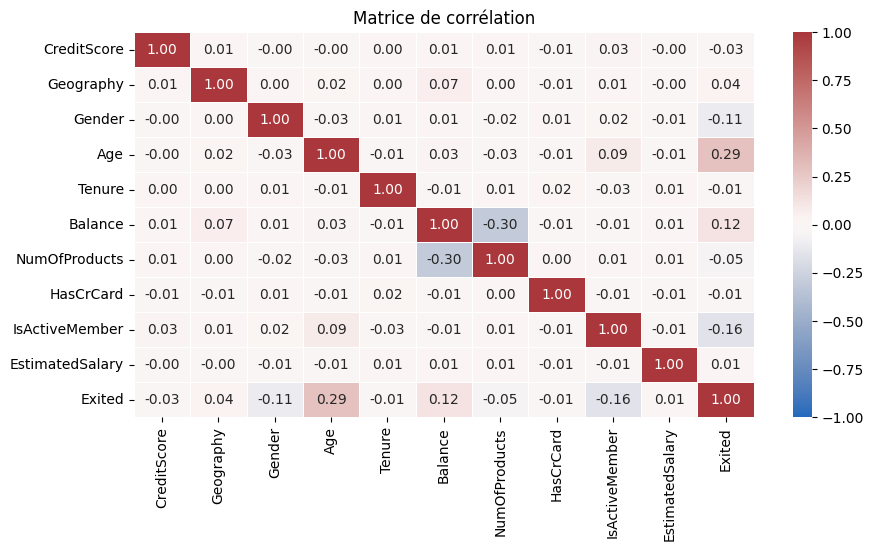

In [44]:
# Identifier les corrélations entre les variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values, cmap = 'vlag',
            annot = True,vmin=-1, vmax=1,fmt=".2f",linewidth=.5,)
plt.title('Matrice de corrélation')
# plt.show()
correlation_matrix.head()

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

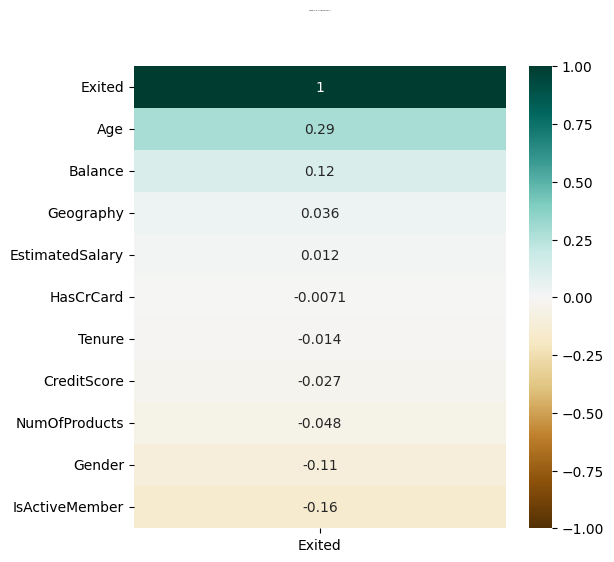

In [46]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation_matrix[['Exited']].sort_values(by='Exited', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Heatmap of Correlation Matrix',fontdict={'fontsize':1}, pad=40)

## Construction du model

##### Séparation des données en train et test

In [49]:
X = df.drop(columns = ['Exited'])
Y = df.iloc[:,-1]

In [128]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [129]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

###### Nous allons diviser les données en ensemble d'entraînement et de test dans un rapport de 70/30 respectivement

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
print('X_train {}'.format(X_train.shape))
print('y_train {}'.format(X_test.shape))
print('X_test  {}'.format(y_train.shape))
print('y_test  {}'.format(y_test.shape))

X_train (7000, 10)
y_train (3000, 10)
X_test  (7000,)
y_test  (3000,)


In [151]:
X_train = X_train.values
X_test = X_test.values

#### Nous allons tester différents modèles afin de choisir le modèle avec un meilleur score

Ci-dessous une liste de cinq(5) algorithme de machine learning les plus utilisés afin de choisir le meilleur modèle:
- Machine à vecteur de support (SVM)
- Méthodes des K plus proches voisins (KNN)
- Arbre de decision (Decision tree)
- Forêt d'arbres décisionnels (Random Forest)
- Régression Logistique (Logistic regression)

### Implementation du model SVM

In [78]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [113]:
y_test_pred_svm = svm.predict(X_test)
print("Capacité de prédiction du modèle est de: ",round(accuracy_score(y_test,y_test_pred_svm)*100,2),"%")

Capacité de prédiction du modèle est de:  80.53 %


<Axes: >

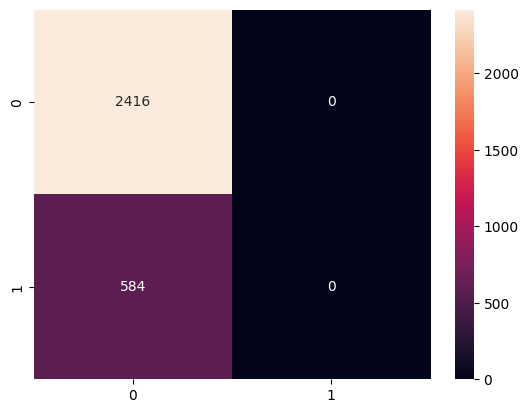

In [80]:
# Matrix de confusion
cm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model K plus proches voisins (KNN)

In [81]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
y_test_pred_knn = knn_model.predict(X_test)
print("Capacité de prédiction du modèle est de: ",round(accuracy_score(y_test,y_test_pred_knn)*100,2),"%")

Capacité de prédiction du modèle est de:  77.07 %


<Axes: >

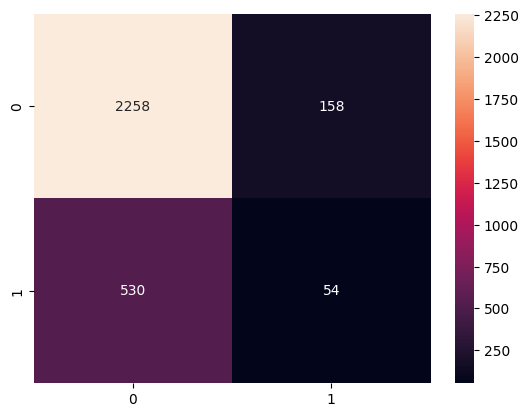

In [83]:
# Matrix de confusion
cm = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Arbre de decision (Decision tree)

In [84]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_test_pred_dt = model_dt.predict(X_test)
print("Capacité de prédiction du modèle est de: ",round(accuracy_score(y_test,y_test_pred_dt)*100,2),"%")

Capacité de prédiction du modèle est de:  79.83 %


<Axes: >

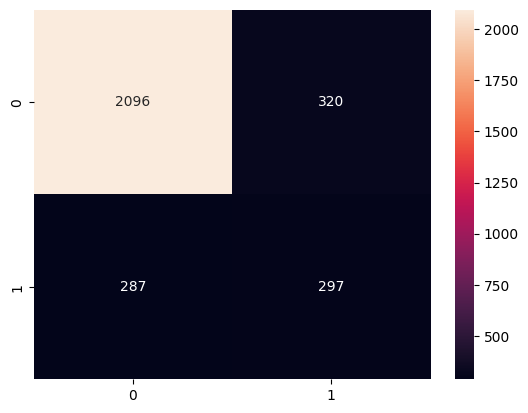

In [64]:
# Matrix de confusion
cm = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Random Forest Classifier

In [114]:
model_rfc=RandomForestClassifier()

In [115]:
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
y_test_pred_rfc = model_rfc.predict(X_test)
print("Capacité de prédiction du modèle est de: ",round(accuracy_score(y_test,y_test_pred_rfc)*100,2),"%")

Capacité de prédiction du modèle est de:  86.57 %


<Axes: >

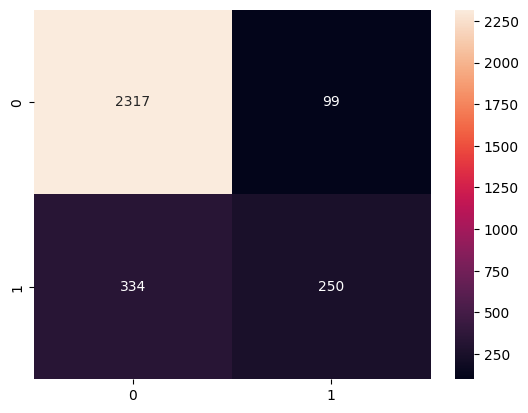

In [90]:
# Matrix de confusion
cm = confusion_matrix(y_test, y_test_pred_rfc)
sns.heatmap(cm,annot=True,fmt="d")

### Implementation du model Régression Logistique (Logistic regression)

In [117]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [118]:
y_test_pred_lr = model_lr.predict(X_test)
print("Capacité de prédiction du modèle est de: ",round(accuracy_score(y_test,y_test_pred_lr)*100,2),"%")

Capacité de prédiction du modèle est de:  80.07 %


<Axes: >

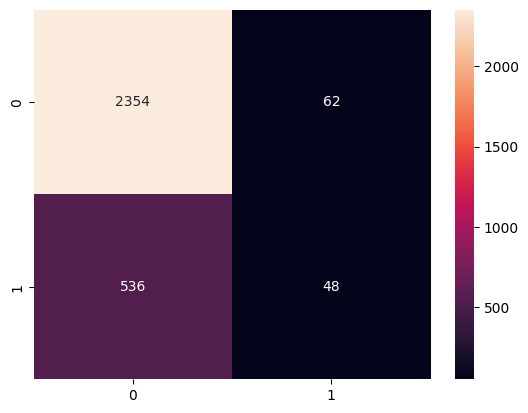

In [95]:
# Matrix de confusion
cm = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm,annot=True,fmt="d")

### Choix et comparaison

In [119]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Models<b>', '<b>Accuracy Score On Test Data (%)<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=20),

                 cells=dict(values=[['<b>SVM<b>', '<b>KNN<b>','<b>Decision three<b>', '<b>Random Forest<b>', '<b>Logistic regression<b>'], [
                                                                          np.round(accuracy_score(y_test_pred_svm,y_test)*100,2),
                                                                          np.round(accuracy_score(y_test_pred_knn,y_test)*100,2),
                                                                          np.round(accuracy_score(y_test_pred_dt,y_test)*100,2),
                                                                          np.round(accuracy_score(y_test_pred_rfc,y_test)*100,2),
                                                                          np.round(accuracy_score(y_test_pred_lr,y_test)*100,2)
                                                                                                               ]]))
                     ])

fig.update_layout(title='Model Results On Test Data')
fig.show()

#### Le meilleur modèle était le  **Random Forest Classifier** avec une précision de 86,57 %, suggèrant sa capacité à bien se généraliser à des instances invisibles.

#### Performance globale du modèle : le modèle démontre de solides performances sur des mesures d'évaluation, indiquant son efficacité à faire des prédictions précises et à capturer les résultats souhaités.

In [120]:
imp_df = pd.DataFrame({"Feature Name":X.columns,
                       "Importance":model_rfc.feature_importances_})

<ipython-input-121-4b1184c1fc54>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




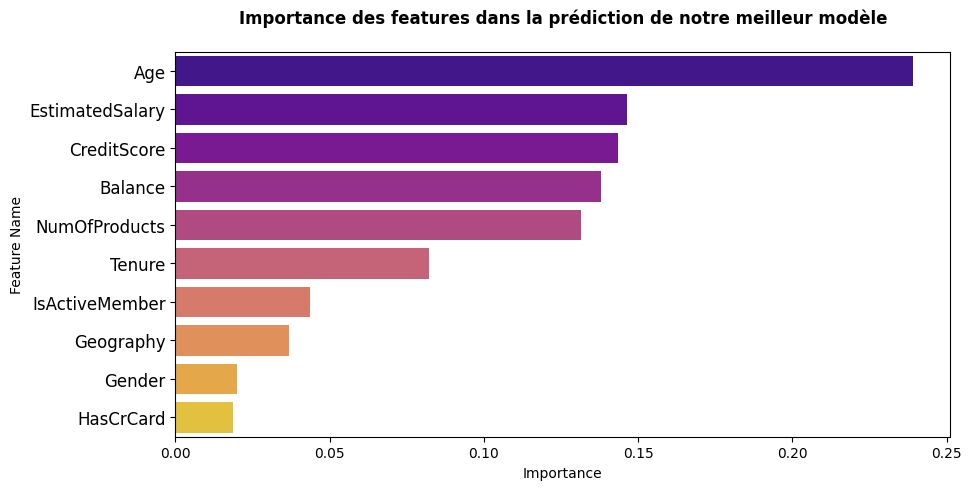

In [121]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Importance des features dans la prédiction de notre meilleur modèle", fontweight="black", size=12, pad=20)
plt.yticks(size=12)
plt.show()

**Les facteurs clés qui influencent de manière significative la désactivation des facilités bancaires des clients sont :**
- Age,
- EstimatedSalary
- CreditScore
- Balance
- NumOfProducts
- Tenure

**L'impact minimal des features sur la désactivation des services bancaires des clients est :**
- IsActiveMember
- Geography
- HasCrCard
- Gender


## Entrainement du modèle sur l'ensemble des données

### Prédiction des données sur l'ensemble des données

In [122]:
y_pred = model_rfc.predict(X)
print("Capacité de prédiction du modèle sur l'ensemble des données est de: ",round(accuracy_score(Y,y_pred)*100,2),"%")

Capacité de prédiction du modèle sur l'ensemble des données est de:  95.97 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



## Prédiction de churn

In [180]:
X.shape

(10000, 10)

In [183]:
X.values

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [186]:
X.values[0]

array([6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
       2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0134888e+05])

In [187]:
X.values[0].shape

(10,)

In [188]:
X.values[0].reshape(1, -1).shape

(1, 10)

In [189]:
X.values[0].reshape(1, -1)

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, 4.2000000e+01,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05]])

In [190]:
prediction = model_rfc.predict(X.values[0].reshape(1, -1))
print(prediction)

[0]


In [191]:
prediction

array([0])

In [192]:
prediction = model_rfc.predict(X.values[1].reshape(1, -1))
print(prediction)

[0]


In [194]:
prediction = model_rfc.predict(X.values[2].reshape(1, -1))
print(prediction)

[1]


## Extraction du fichier modèle pour le déploiement

In [195]:
import pickle

In [196]:
pickle.dump(model_rfc,open('rfcmodel.pkl','wb'))

In [197]:
pickled_model=pickle.load(open('rfcmodel.pkl','rb'))

In [198]:
## Prediction
pickled_model.predict(X.values[2].reshape(1, -1))

array([1])

##### =====================================================================================